<a href="https://colab.research.google.com/github/artemis2410/Marketing-Analytics/blob/master/hbonds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install mdtraj

     |████████████████████████████████| 6.1MB 21.2MB/s 


In [2]:
import numpy as np
import pandas as pd
import mdtraj as md

In [4]:
ALA_wat=md.load('ALA_wat.pdb')
print(ALA_wat)

<mdtraj.Trajectory with 1 frames, 639 atoms, 110 residues, and unitcells>


In [5]:
print(ALA_wat.xyz)

[[[1.112  0.7    1.308 ]
  [1.118  0.692  1.4111]
  [1.0489 0.6279 1.2839]
  ...
  [1.1214 1.5509 0.1943]
  [1.1465 1.494  0.1172]
  [1.1035 1.6419 0.1478]]]


In [6]:
ALA_wat.n_atoms

639

In [7]:
ALA_wat.n_residues

110

In [8]:
h_bonds=md.baker_hubbard(ALA_wat,exclude_water=False,distance_cutoff=0.35,angle_cutoff=135,periodic=True)#Distance Cut-Off -3.5A #Angle-CutOff=135
for hbond in h_bonds:
  print(str(ALA_wat.topology.atom(hbond[0]))+"---------------"+str(ALA_wat.topology.atom(hbond[2])))

#Fiddling with the angles and distance cut-offs a bit
angles=np.linspace(120,150,30)
distances=np.linspace(0.2,0.5,30)

Ang,Dis=np.meshgrid(angles,distances)
def n_hbonds(angle,distance):
  return md.baker_hubbard(ALA_wat,exclude_water=False,distance_cutoff=distance,angle_cutoff=angle,periodic=True).shape[0]



ALA1-N---------------HOH4-O
ALA1-N---------------HOH1-O
LEU2-N---------------HOH1-O
ALA3-N---------------HOH1-O


In [9]:
Z=np.zeros((30,30))
for i in range(30):
  for j in range(30):
    Z[i][j]=n_hbonds(Ang[i][j],Dis[i][j])


(0.17, 0.55)

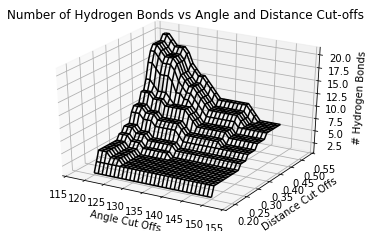

In [10]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

fig=plt.figure()
ax=plt.axes(projection='3d')
ax.plot_wireframe(Ang,Dis,Z,color="black")
ax.set_title("Number of Hydrogen Bonds vs Angle and Distance Cut-offs")
ax.set_xlabel("Angle Cut Offs")
ax.set_ylabel("Distance Cut Offs")
ax.set_zlabel("# Hydrogen Bonds")
ax.set_xlim(115,155)
ax.set_ylim(0.17,0.55)




In [72]:
h_bonds

array([[  0,   1, 165],
       [  0,   3, 540],
       [ 12,  13, 489],
       [ 31,  32, 507]])

In [82]:
ALA_wat.xyz[0][0]

array([1.112, 0.7  , 1.308], dtype=float32)

In [13]:
table,Bonds=ALA_wat.top.to_dataframe()

In [15]:
table

,serial,name,element,resSeq,resName,chainID,segmentID
0,1,N,N,1,ALA,0,
1,2,H,H,1,ALA,0,
2,3,H2,H,1,ALA,0,
3,4,H3,H,1,ALA,0,
4,5,CA,C,1,ALA,0,
...,...,...,...,...,...,...,...
634,635,H,H,2,HOH,1,
635,636,H,H,2,HOH,1,
636,637,O,O,2,HOH,1,
637,638,H,H,2,HOH,1,


In [42]:
table['resName'].unique()

array(['ALA', 'LEU', 'HOH'], dtype=object)

In [78]:
H_BOND_T=table.iloc[h_bonds.flatten(),:]
H_BOND_T.index=np.linspace(0,11,12)


In [21]:
#Compute the hydrogen bond angles
h_bond_angles=md.compute_angles(ALA_wat,h_bonds)*180/np.pi 
h_bond_angles

array([[157.40071, 162.6531 , 167.92317, 174.2051 ]], dtype=float32)

In [19]:
#Computing H-bond-Distances (2 distances per bond)
pairs_1=[[h_bonds[i][0],h_bonds[i][1]] for i in range(h_bonds.shape[0])]
pairs_2=[[h_bonds[i][1],h_bonds[i][2]] for i in range(h_bonds.shape[0])]
pairs_1.extend(pairs_2)
pairs=np.array(pairs_1)
h_bond_distances=md.compute_distances(ALA_wat,pairs)
print(h_bond_distances)


[[0.10358389 0.09608252 0.10115039 0.10824806 0.16293032 0.32382247
  0.20058402 0.20527396]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

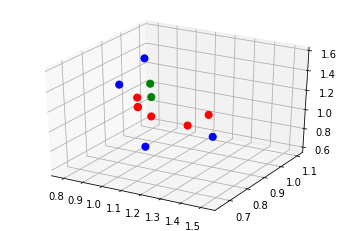

In [79]:
# Trying to plot the molecule itself
X_coord=[]
Y_coord=[]
Z_coord=[]
for i in h_bonds.flatten():
  
  X_coord.append(ALA_wat.xyz[0][i][0])
  Y_coord.append(ALA_wat.xyz[0][i][1])
  Z_coord.append(ALA_wat.xyz[0][i][2])

def cm(i):
  
  if (ALA_wat.top.atom(i).residue.name=='HOH'):
    return "blue"
  elif (ALA_wat.top.atom(i).residue.name=='ALA'):
    return "red"
  else:
    return "green"


color_map=[]
for j in h_bonds.flatten():
  color_map.append(cm(j))



fig=plt.figure()
ax1=plt.axes(projection='3d')
ax1.scatter3D(X_coord,Y_coord,Z_coord,s=50,c=color_map,depthshade=False)


#Note-Red-Non-HOH residue
#Blue -HOH residue

H_BOND_T['X']=X_coord;

H_BOND_T['Y']=Y_coord;

H_BOND_T['Z']=Z_coord;

In [80]:
H_BOND_T

,serial,name,element,resSeq,resName,chainID,segmentID,X,Y,Z
0.0,1,N,N,1,ALA,0,,1.1120,0.7000,1.3080
1.0,2,H,H,1,ALA,0,,1.1180,0.6920,1.4111
2.0,166,O,O,4,HOH,1,,1.0717,0.6505,1.5617
3.0,1,N,N,1,ALA,0,,1.1120,0.7000,1.3080
4.0,4,H3,H,1,ALA,0,,1.1972,0.6809,1.2679
5.0,541,O,O,1,HOH,1,,1.5159,0.6587,1.2150
6.0,13,N,N,2,LEU,0,,0.9410,0.9470,1.0930
7.0,14,H,H,2,LEU,0,,0.8860,0.9990,1.1601
8.0,490,O,O,1,HOH,1,,0.7875,1.0708,1.3194
9.0,32,N,N,3,ALA,0,,1.1000,1.1030,0.8020


In [23]:
import plotly.express as px
import plotly.io as pio

In [25]:
help(px.scatter_3d)

Help on function scatter_3d in module plotly.express._chart_types:

scatter_3d(data_frame=None, x=None, y=None, z=None, color=None, symbol=None, size=None, text=None, hover_name=None, hover_data=None, custom_data=None, error_x=None, error_x_minus=None, error_y=None, error_y_minus=None, error_z=None, error_z_minus=None, animation_frame=None, animation_group=None, category_orders={}, labels={}, size_max=None, color_discrete_sequence=None, color_discrete_map={}, color_continuous_scale=None, range_color=None, color_continuous_midpoint=None, symbol_sequence=None, symbol_map={}, opacity=None, log_x=False, log_y=False, log_z=False, range_x=None, range_y=None, range_z=None, title=None, template=None, width=None, height=None)
        In a 3D scatter plot, each row of `data_frame` is represented by a
        symbol mark in 3D space.
        
    Parameters
    ----------
    data_frame: DataFrame or array-like or dict
        This argument needs to be passed for column names (and not keyword
   

In [87]:
hover_names=[]
for i in h_bonds.flatten():
  name=str(ALA_wat.top.atom(i).residue.name)
  hover_names.append(name)
hover_data=[]

for i in h_bonds.flatten():
  data=str(ALA_wat.top.atom(i).residue.name)+"\n "+"Atom name : "+str(ALA_wat.top.atom(i).name)+"\n"+"Element name  :"+str(ALA_wat.top.atom(i).element.name)
  hover_data.append(data)

sizes=[]

for i in h_bonds.flatten():
  size=ALA_wat.top.atom(i).element.radius
  sizes.append(size)

color_dis_map={'ALA':'red','HOH':'blue','LEU':'green'};

fig=px.scatter_3d(H_BOND_T,x='X',y='Y',z='Z',template='gridon',color='resName',color_discrete_map=color_dis_map,range_x=[0,2],range_y=[0,2],range_z=[0,2],width=700,height=700,hover_name=hover_names,size=sizes)
fig.show()
